<blockquote>
    <h1>Exercise 9.5</h1>
    <p>We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.</p>
    <ol>
        <li>
            Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:<br>
<code>> x1=runif(500)-0.5
> x2=runif(500)-0.5
> y=1*(x1^2-x2^2 > 0)
</code>
        </li>
        <li>Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the $x$-axis, and $X_2$ on the $y$-axis.</li>
        <li>Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.</li>
        <li>Apply this model to the <i>training data</i> in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the <i>predicted</i> class labels. The decision boundary should be linear.</li>
        <li>Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1 \times X_2$, $\log(X_2)$, and so forth).</li>
        <li>Apply this model to the <i>training data</i> in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the <i>predicted</i> class labels. The decision boundary should be obviously non-linear. If it is not, then repeat 1-5 until you come up with an example in which the predicted class labels are obviously non-linear.</li>
        <li>Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the <i>predicted class labels</i>.</li>
        <li>Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the <i>predicted class labels</i>.</li>
        <li>Comment on your results.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

<h3>Exercise 9.5.1</h3>
<blockquote>
    <i>
        Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:<br>
<code>> x1=runif(500)-0.5
> x2=runif(500)-0.5
> y=1*(x1^2-x2^2 > 0)
</code>
    </i>
</blockquote>

In [2]:
np.random.seed(42)
n = 500
x1 = np.random.uniform(low=0.0, high=1.0, size=n) - 0.5
x2 = np.random.uniform(low=0.0, high=1.0, size=n) - 0.5
x = np.vstack((x1, x2)).T
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

f = x1**2 - x2**2
y = np.where(f > 0, True, False)

<h3>Exercise 9.5.2</h3>
<blockquote>
    <i>Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the $x$-axis, and $X_2$ on the $y$-axis.</i>
</blockquote>

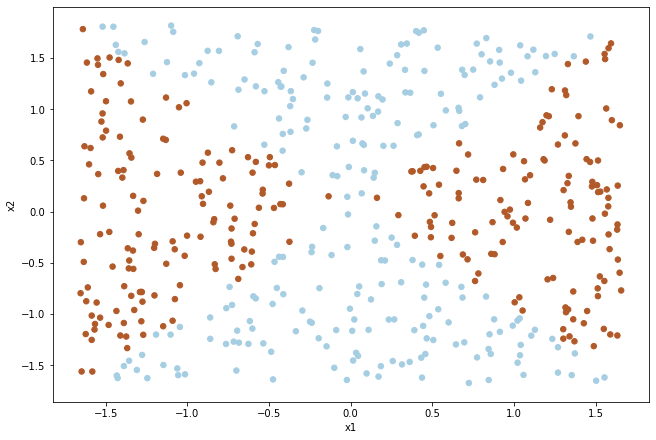

In [3]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y, s=30, cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

<h3>Exercise 9.5.3</h3>
<blockquote>
    <i>Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.</i>
</blockquote>

In [4]:
log_reg = LogisticRegression()
_ = log_reg.fit(x_standardized, y)

<h3>Exercise 9.5.4</h3>
<blockquote>
    <i>Apply this model to the <i>training data</i> in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the <i>predicted</i> class labels. The decision boundary should be linear.</i>
</blockquote>

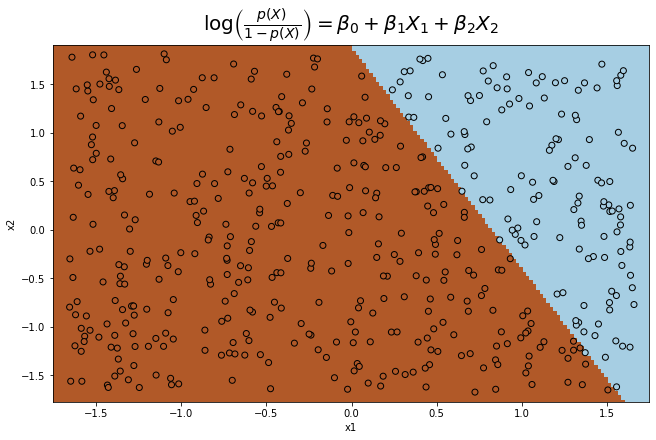

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x1_min, x1_max = x_standardized[:, 0].min() - 0.1, x_standardized[:, 0].max() + 0.1
x2_min, x2_max = x_standardized[:, 1].min() - 0.1, x_standardized[:, 1].max() + 0.1
h = .02  # step size in the mesh
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Y = log_reg.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = log_reg.predict(x_standardized)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
_ = ax.set_title(r'$\log \left( \frac{p(X)}{1 - p(X)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2$', 
                 fontsize=20)

<h3>Exercise 9.5.5</h3>
<blockquote>
    <i>Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1 \times X_2$, $\log(X_2)$, and so forth).</i>
</blockquote>

In [6]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
x_poly = poly.fit_transform(x_standardized[:, 0].reshape(-1, 1))
x_poly = np.concatenate((x_poly, np.reshape(x_standardized[:, 1], (-1, x_standardized[:, 1].shape[0])).T), axis=1)
log_reg_poly = LogisticRegression()
_ = log_reg_poly.fit(x_poly, y)

In [7]:
interaction = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
x_interaction = interaction.fit_transform(x_standardized)
log_reg_interaction = LogisticRegression()
_ = log_reg_interaction.fit(x_interaction, y)

<h3>Exercise 9.5.6</h3>
<blockquote>
    <i>Apply this model to the <i>training data</i> in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the <i>predicted</i> class labels. The decision boundary should be obviously non-linear. If it is not, then repeat 1-5 until you come up with an example in which the predicted class labels are obviously non-linear.</i>
</blockquote>

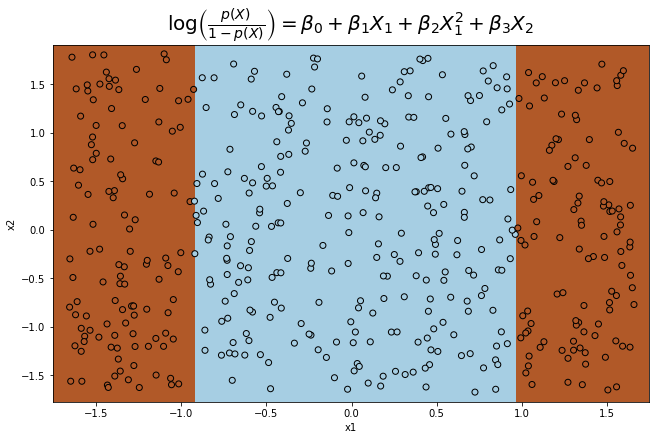

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
xx = np.c_[xx1.ravel(), xx2.ravel()]
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
xx_poly = poly.fit_transform(xx[:, 0].reshape(-1, 1))
xx_poly = np.concatenate((xx_poly, np.reshape(xx_poly[:, 1], (-1, xx_poly[:, 1].shape[0])).T), axis=1)
Y = log_reg_poly.predict(xx_poly)

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = log_reg_poly.predict(x_poly)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
_ = ax.set_title(r'$\log \left( \frac{p(X)}{1 - p(X)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2$', 
                 fontsize=20)

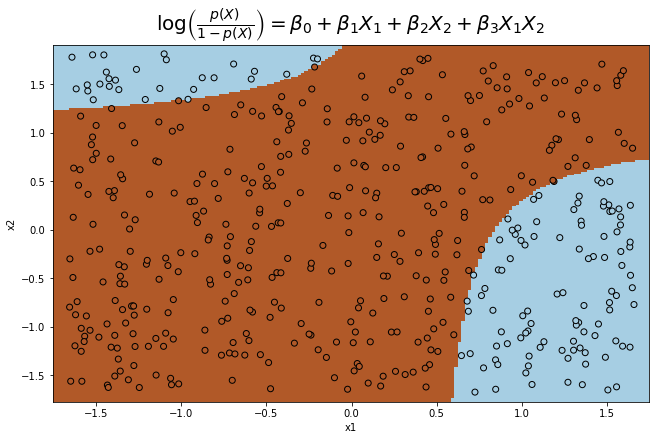

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
interaction = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
xx_interaction = interaction.fit_transform(xx)
Y = log_reg_interaction.predict(xx_interaction)

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = log_reg_interaction.predict(x_interaction)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
_ = ax.set_title(r'$\log \left( \frac{p(X)}{1 - p(X)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$', 
                 fontsize=20)

<h3>Exercise 9.5.7</h3>
<blockquote>
    <i>Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the <i>predicted class labels</i>.</i>
</blockquote>

In [10]:
# support vector classifier
# use cross validation to find the optimum value for C
linear_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='linear')),
])

param_grid={
    'linear_svc__C': np.linspace(0, 0.5, 51),
}

grid_search_linear_svm_class = GridSearchCV(linear_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_linear_svm_class.fit(x, y)

print(grid_search_linear_svm_class.best_estimator_)
print(grid_search_linear_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=0.05, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.528


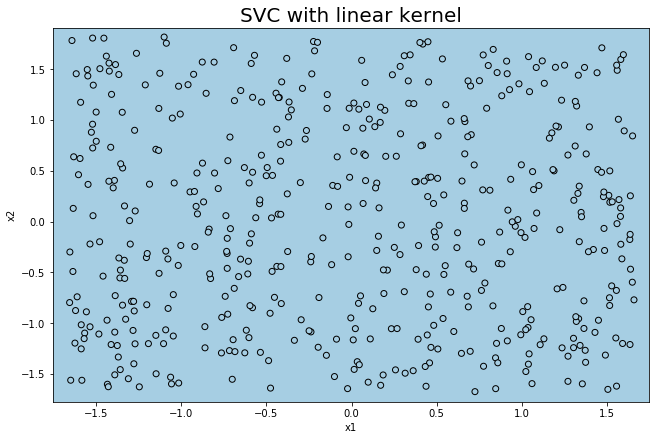

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
linear_svm_class_best = grid_search_linear_svm_class.best_estimator_
Y = linear_svm_class_best.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = linear_svm_class_best.predict(x_standardized)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
_ = ax.set_title('SVC with linear kernel', 
                 fontsize=20)

<h3>Exercise 9.5.8</h3>
<blockquote>
    <i>Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the <i>predicted class labels</i>.</i>
</blockquote>

In [12]:
# support vector machine with a polynomial kernel 
# use cross validation to find the optimum value for C and degree
poly_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel='poly')),
])

param_grid={
    'poly_svc__C': np.linspace(0, 0.5, 51),
    'poly_svc__degree': range(1, 5),
}

grid_search_poly_svm_class = GridSearchCV(poly_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_poly_svm_class.fit(x, y)

print(grid_search_poly_svm_class.best_estimator_)
print(grid_search_poly_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_svc',
                 SVC(C=0.41000000000000003, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=2, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.958


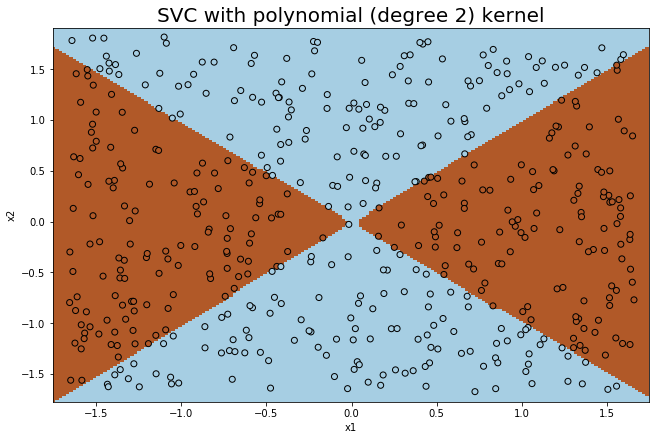

In [13]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
poly_svm_class_best = grid_search_poly_svm_class.best_estimator_
Y = poly_svm_class_best.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = poly_svm_class_best.predict(x_standardized)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
degree_optimum = grid_search_poly_svm_class.best_params_['poly_svc__degree']
_ = ax.set_title(f'SVC with polynomial (degree {degree_optimum}) kernel', 
                 fontsize=20)

In [14]:
# support vector machine with a radial kernel 
# use cross validation to find the optimum value for C and gamma
rbf_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_svc', SVC(kernel='rbf')),
])

param_grid={
    'rbf_svc__C': np.linspace(0.5, 1, 51),
    'rbf_svc__gamma': np.linspace(0.5, 1.5, 101),
}

grid_search_rbf_svm_class = GridSearchCV(rbf_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_rbf_svm_class.fit(x, y)

print(grid_search_rbf_svm_class.best_estimator_)
print(grid_search_rbf_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_svc',
                 SVC(C=0.73, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.97,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.976


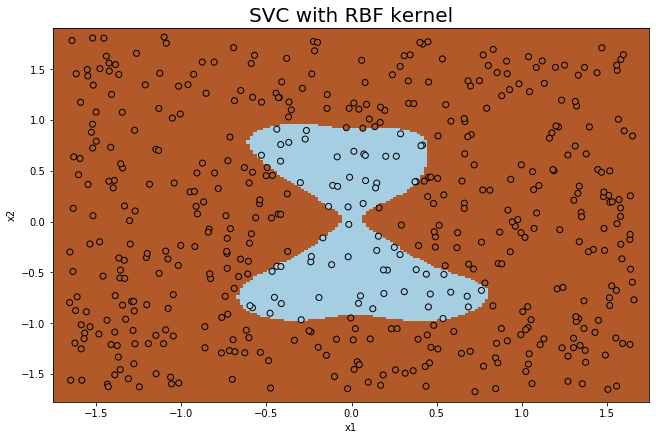

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
rbf_svm_class_best = grid_search_rbf_svm_class.best_estimator_
Y = rbf_svm_class_best.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Y = Y.reshape(xx1.shape)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.pcolormesh(xx1, xx2, Y, cmap=plt.cm.Paired)

# Plot also the training points
y_pred = rbf_svm_class_best.predict(x_standardized)
_ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

_ = ax.set_xlim(xx1.min(), xx1.max())
_ = ax.set_ylim(xx2.min(), xx2.max())
degree_optimum = grid_search_poly_svm_class.best_params_['poly_svc__degree']
_ = ax.set_title('SVC with RBF kernel', 
                 fontsize=20)

<h3>Exercise 9.5.9</h3>
<blockquote>
    <i>Comment on your results.</i>
</blockquote>

<p>The support vector machine with a polynomial kernel of degree 2 seems to yields the best fits of the training data.</p>